### Import some libraries

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier


#### Load Dataset

In [32]:
df=pd.read_csv("c:\\Users\\Isha\\Desktop\\AI class\\DS dataset\\iphone_ knn dataset.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#### Use Label encoder to encode the row data  (gender)

In [33]:
Label=LabelEncoder()
Label

LabelEncoder()

In [34]:
df["Gender"]=Label.fit_transform(df["Gender"])

In [35]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.1 KB


In [37]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<Axes: >

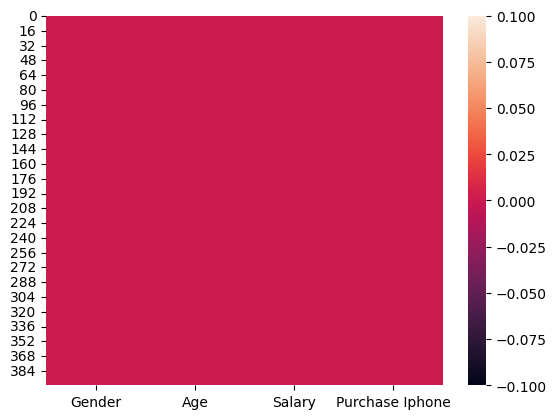

In [38]:
sns .heatmap(df.isnull())

In [39]:
df.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [40]:
df.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
Salary,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,-0.042469,0.622454,0.362083,1.000000


<Axes: >

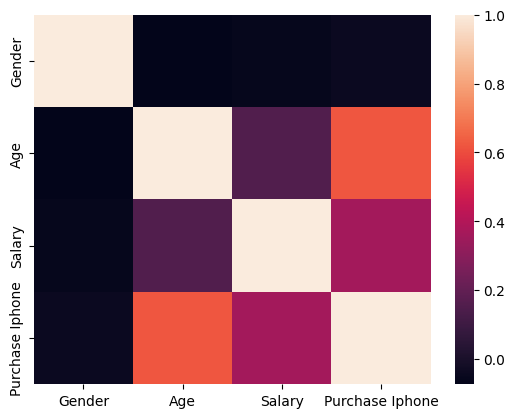

In [41]:
sns.heatmap(df.corr())

In [42]:
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']

#### Use satndard scaler fro normalize the data 

In [43]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)


### Split the data into train test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_test.shape

(80, 3)

In [46]:
y_test.shape

(80,)

In [47]:
X_train.shape

(320, 3)

In [48]:
y_train.shape

(320,)

#### Create and fit the model 

In [50]:
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
y_pred=knn.predict(X_test)

#### Evaluate the model

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  3],
       [15, 13]], dtype=int64)

<Axes: >

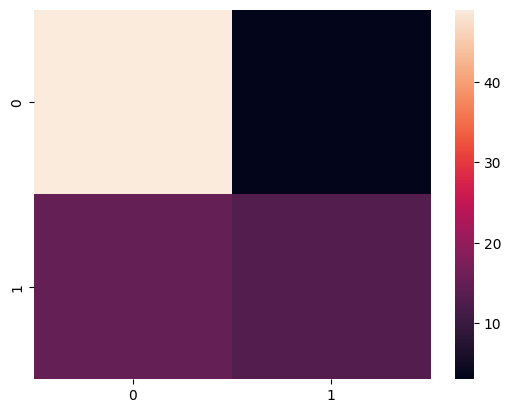

In [56]:
sns.heatmap(cm)

In [55]:
score=knn.score(X_test,y_test)

0.775